#Task 5
## Decision Trees and Random Forests



##Objective: Learn tree-based models for classification & regression.





##Importing Libraries and Loading Data


In [1]:
from graphviz import Source
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
y = df['target']

##Initial Data Exploration

In [3]:
# Display the first few rows of the dataset
print(df.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Get basic statistics of the dataset
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

##Train-Test Split

In [6]:

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Decision Tree Classifier and visualize the tree

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Export for Graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=X.columns,
                class_names=['No Disease', 'Disease'], filled=True)


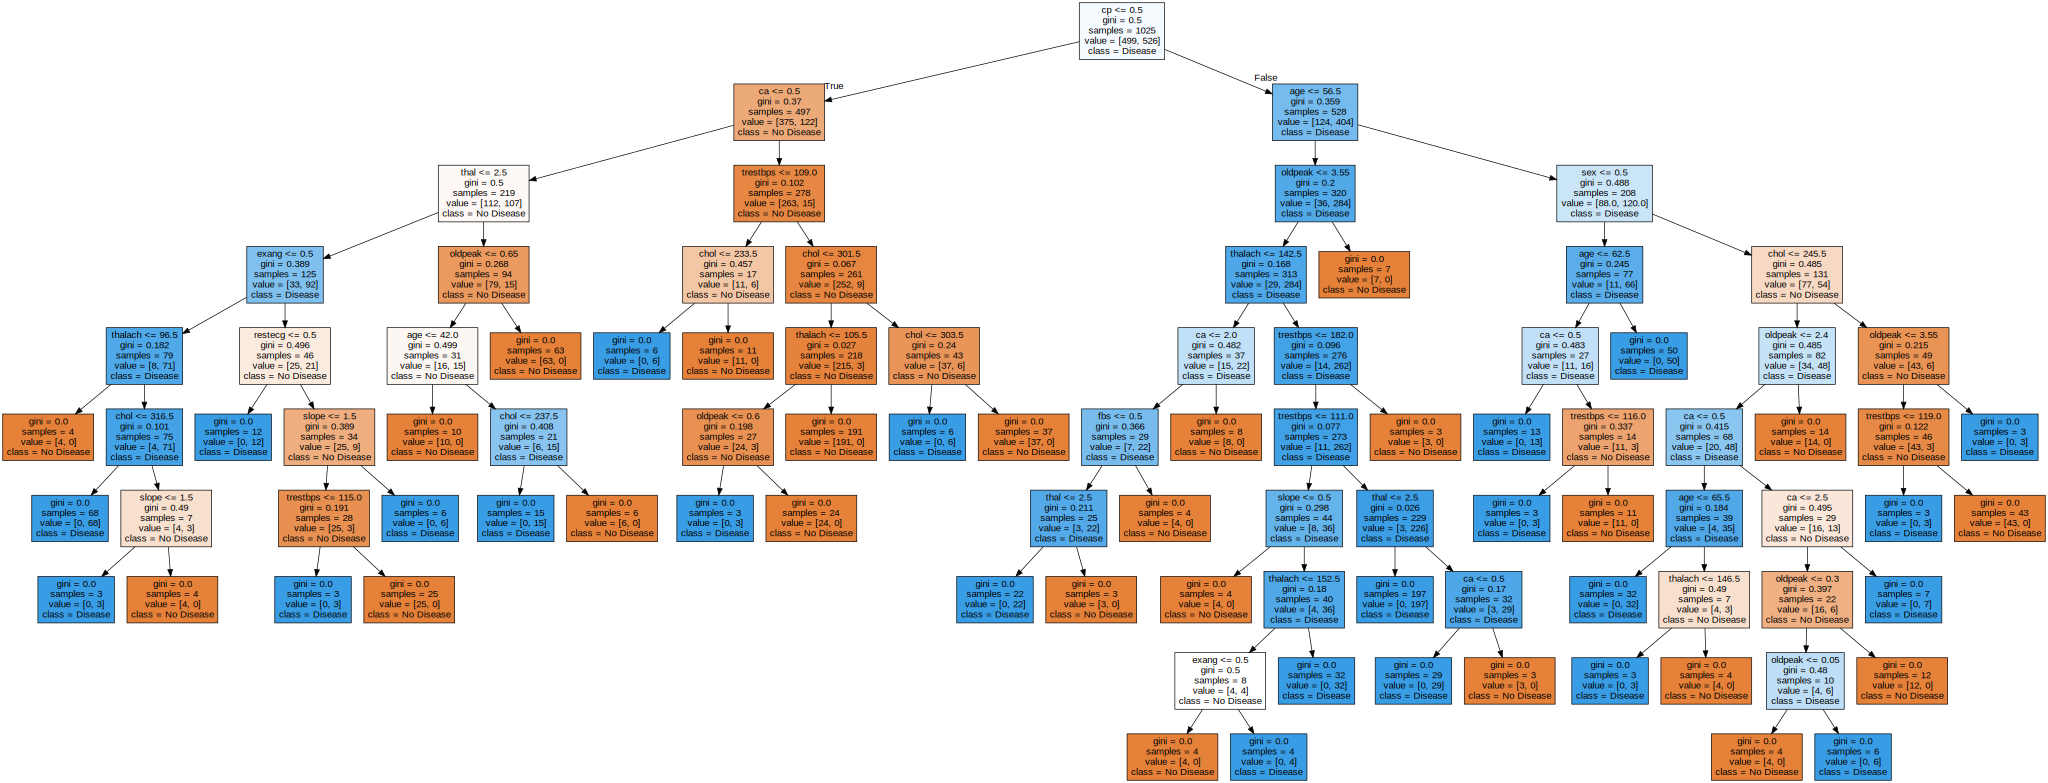

In [8]:

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,
                           class_names=['No Disease', 'Disease'], filled=True)
Source(dot_data)

##Analyze Overfitting & Control Tree Depth

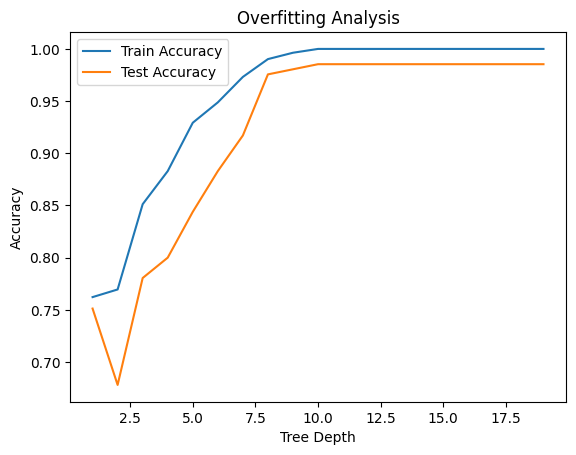

In [9]:
train_acc = []
test_acc = []
depths = range(1, 20)

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    train_acc.append(tree.score(X_train, y_train))
    test_acc.append(tree.score(X_test, y_test))

plt.plot(depths, train_acc, label='Train Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Overfitting Analysis')
plt.show()


*  The ideal depth is usually where test accuracy is highest before the curve flattens or diverges.
*  From your plot, max_depth = 9 is a good balance between high accuracy and generalization.

##Apply Optimal Tree Depth:

In [10]:

clf_pruned = DecisionTreeClassifier(max_depth=9, random_state=42)
clf_pruned.fit(X_train, y_train)

print("Train Accuracy:", clf_pruned.score(X_train, y_train))
print("Test Accuracy:", clf_pruned.score(X_test, y_test))


Train Accuracy: 0.9963414634146341
Test Accuracy: 0.9804878048780488


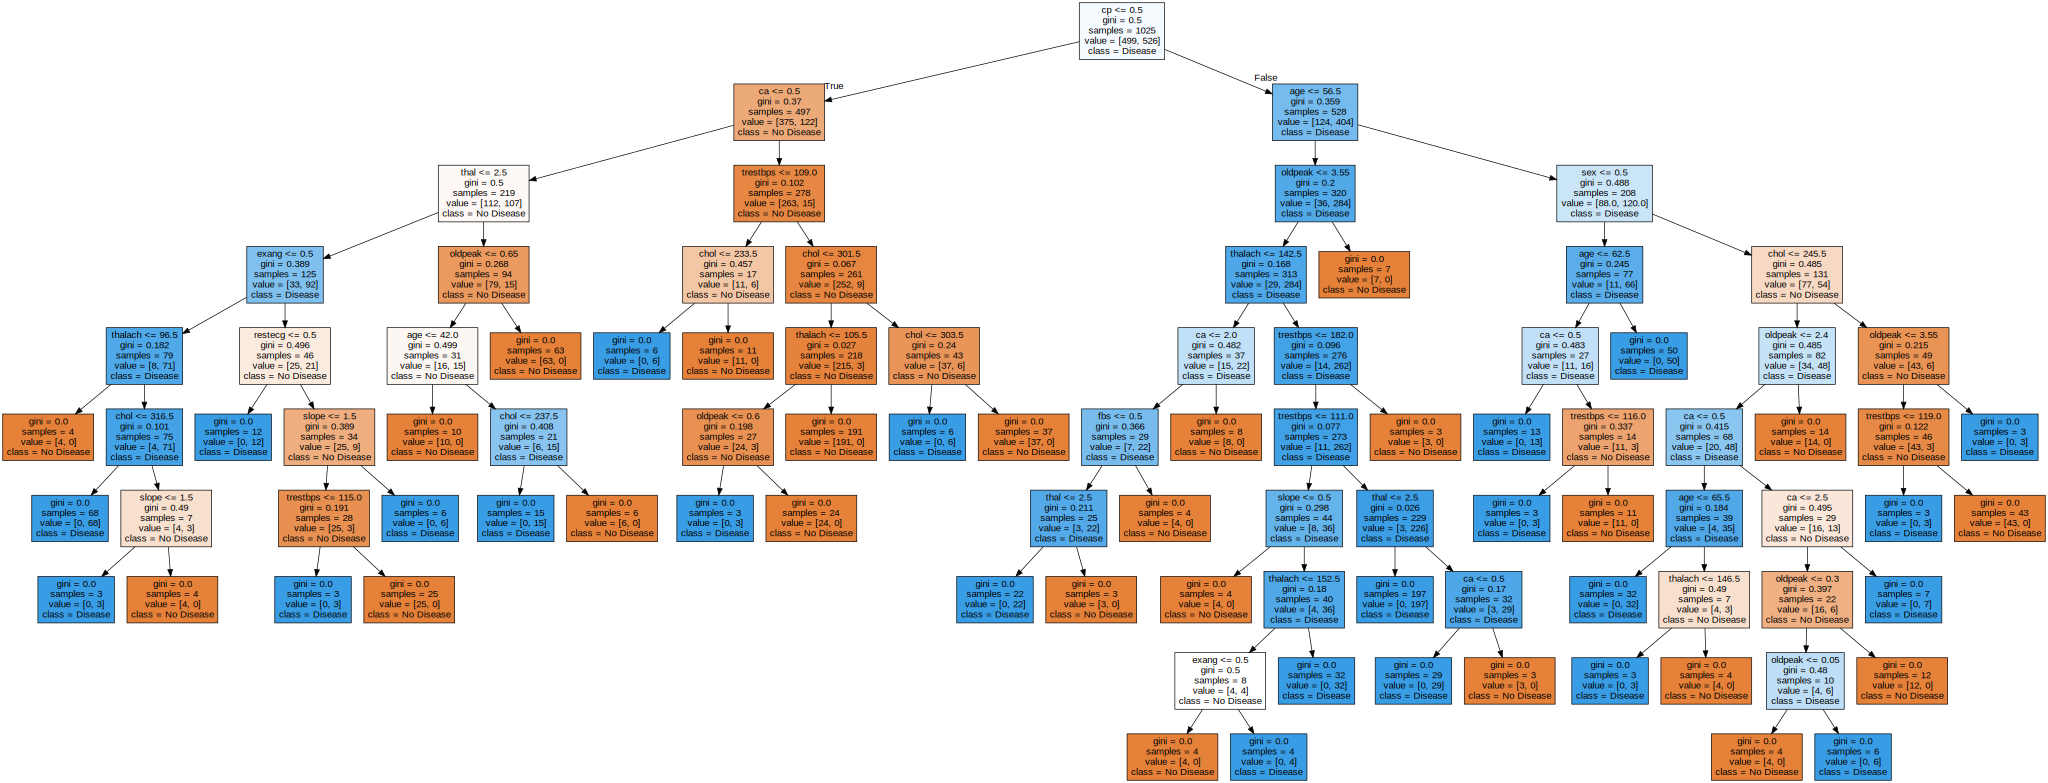

In [11]:
#Visualize Optimal Tree

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,
                           class_names=['No Disease', 'Disease'], filled=True)
Source(dot_data)

## Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9853658536585366


##Feature Importances


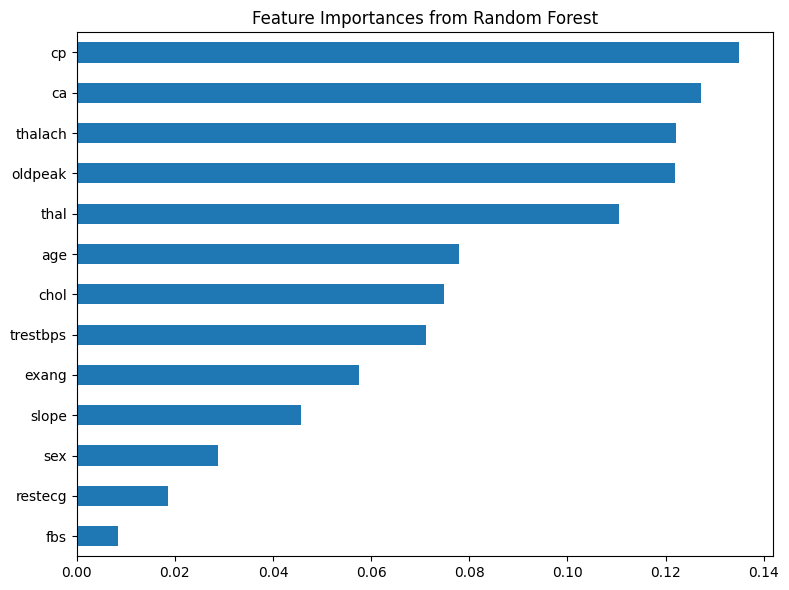

In [13]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

## Cross-Validation



In [14]:
tree_cv = cross_val_score(clf, X, y, cv=5).mean()
rf_cv = cross_val_score(rf, X, y, cv=5).mean()

print("Cross-validated Accuracy (Decision Tree):", round(tree_cv, 3))
print("Cross-validated Accuracy (Random Forest):", round(rf_cv, 3))

Cross-validated Accuracy (Decision Tree): 1.0
Cross-validated Accuracy (Random Forest): 0.997
